<a href="https://colab.research.google.com/github/cristobalperezp/Intro_Deep_Learning/blob/main/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> Tarea 1 - Introducción al Deep Learning
<h2 align="center">  Integrantes: 
<h3 align="center"> IN6534-1 - Introducción al Deep Learning
<h3 align="center"> Primavera 2022

---

# Lectura de Datos

In [1]:
! pip install squarify
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")
#warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
sns.set(
    context = 'notebook',
    style='whitegrid',
    palette = sns.color_palette("vlag")
    )
cmap = sns.color_palette("vlag", as_cmap=True)

In [3]:
!git clone 'https://github.com/cristobalperezp/Intro_Deep_Learning.git'

fatal: destination path 'Intro_Deep_Learning' already exists and is not an empty directory.


In [4]:
path_base = '/content/Intro_Deep_Learning'

In [5]:
df = pd.read_excel('/content/Intro_Deep_Learning/T1_credito.xlsx')

# Análisis Exploratorio de Datos

## Exploración Inicial

In [6]:
df.head()

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj
0,100001,4.0,2.0,9561.984843,7660.036317,40.0,64117.447797,44473.097916,N,SupInc,S
1,100002,28.0,25.0,11985.886924,6872.030508,49.0,124062.085998,84958.101814,N,Med,N
2,100003,2.0,3.0,1028.356328,1075.598877,38.0,32010.884862,27638.818281,N,SupCom,N
3,100004,11.0,14.0,10974.303210,2377.430575,43.0,172337.436327,125056.572446,N,Bas,N
4,100005,3.0,1.0,842.807194,1142.827425,33.0,25937.760762,23755.321327,N,SupInc,S


In [7]:
df.shape

(3000, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            3000 non-null   int64  
 1   AgnosDirec    2999 non-null   float64
 2   AgnosEmpleo   2998 non-null   float64
 3   DeudaExt      2999 non-null   float64
 4   DeudaInt      2996 non-null   float64
 5   Edad          2998 non-null   float64
 6   Ingreso       2998 non-null   float64
 7   Ingreso2      3000 non-null   float64
 8   Nacionalidad  3000 non-null   object 
 9   NivelEdu      3000 non-null   object 
 10  VarObj        3000 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 257.9+ KB


In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

ID              3000
AgnosDirec        45
AgnosEmpleo       41
DeudaExt        2999
DeudaInt        2996
Edad              54
Ingreso         2998
Ingreso2        2999
Nacionalidad       1
NivelEdu           5
VarObj             2
dtype: int64

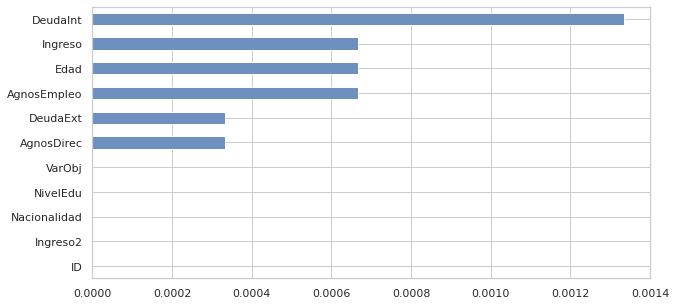

In [11]:
(df.isna().sum()/df.shape[0]).sort_values().plot.barh(figsize=(10, 5))

In [12]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
ID,3000.0,101500.500,866.170,100001.000,100750.750,101500.500,102250.250,103000.000
AgnosDirec,2999.0,7.088,6.962,0.000,2.000,5.000,10.000,61.000
AgnosEmpleo,2998.0,7.147,6.653,0.000,2.000,5.000,10.000,47.000
DeudaExt,2999.0,4531.013,7084.775,21.551,1110.243,2278.662,5093.769,123939.236
DeudaInt,2996.0,2275.677,5409.792,8.304,416.039,958.279,2318.271,190648.853
Edad,2998.0,37.660,36.634,18.000,29.000,36.500,44.000,1970.000
Ingreso,2998.0,62567.743,49385.681,-13123.602,30282.678,49516.129,78851.470,536488.400
Ingreso2,3000.0,52152.667,42246.043,-9723.719,25109.557,40632.271,66206.198,513618.589


In [13]:
# Outliers en: Edad, Ingreso1, Ingreso2

In [14]:
mask = df['Edad']>90
df[mask]

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj
137,100138,7.0,13.0,11982.421363,8423.543356,1970.0,134230.440064,114093.282397,N,Med,N


In [15]:
mask = df['ID'] == 100138
df.loc[mask,'Edad'] = 2022-df[mask]['Edad']

In [16]:
mask = df['Edad']>90
df[mask]

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj


In [17]:
mask = df['Ingreso']<0
df[mask]

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj
521,100522,3.0,0.0,797.023075,670.738436,29.0,-13123.60228,-9723.719313,N,Bas,S


In [18]:
mask = df['ID'] == 100522
df.loc[mask,'Ingreso'] = -df[mask]['Ingreso']

In [19]:
mask = df['Ingreso']<0
df[mask]

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj


In [20]:
mask = df['Ingreso2']<0
df[mask]

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj
521,100522,3.0,0.0,797.023075,670.738436,29.0,13123.60228,-9723.719313,N,Bas,S


In [21]:
mask = df['ID'] == 100522
df.loc[mask,'Ingreso2'] = -df[mask]['Ingreso2']

In [22]:
mask = df['Ingreso2']<0
df[mask]

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj


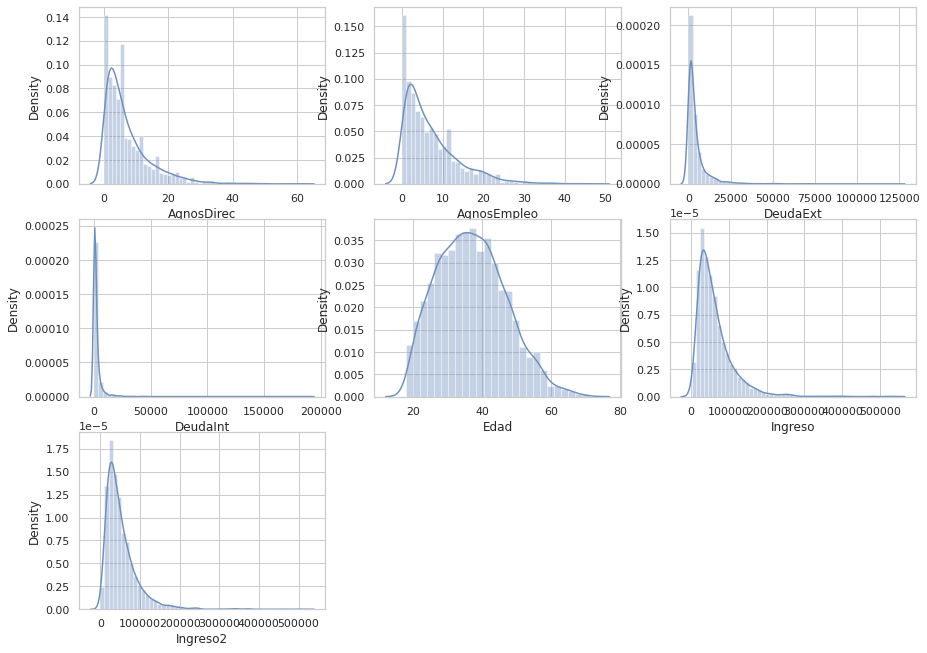

In [23]:
graf = df.copy()
graf = graf.iloc[:,1:8]

f = plt.figure(figsize=(15,15))
for i in range(7):
    f.add_subplot(4, 3, i+1)
    sns.distplot(graf.iloc[:,i])
plt.show()

In [24]:
#fig, axes = plt.subplots(figsize=(15,15),ncols=4, nrows=2)

#for i, ax in zip(range(1,8), axes.flat):
 #   sns.distplot(df.iloc[:,i], ax=ax)
#plt.show()

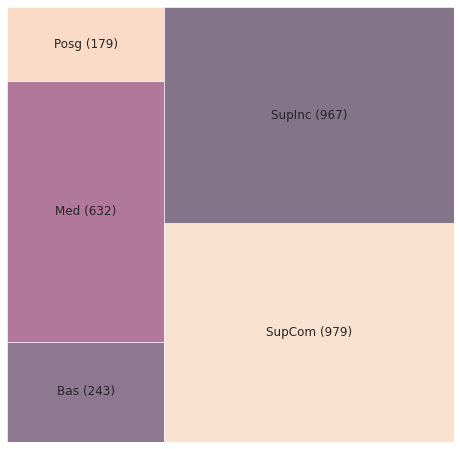

In [25]:
a = df.groupby('NivelEdu').sum().index.get_level_values(0).tolist()
d = df.groupby('NivelEdu').count().reset_index()['ID'].tolist()
for i in range(len(a)):
  a[i] = str(a[i]) + ' (' + str(d[i])+ ')'
plt.figure(figsize=(8,8))
squarify.plot(sizes=d, label=a, alpha=.6)
plt.axis('off')
plt.show()

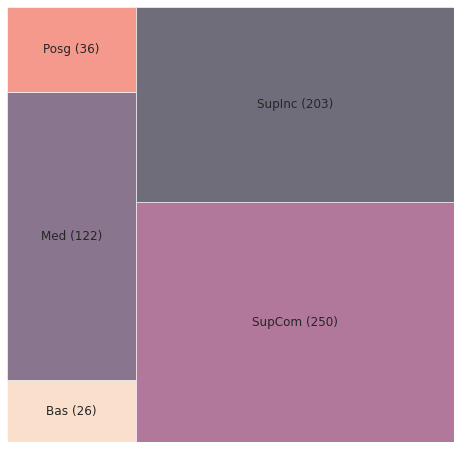

In [26]:
mask = df['VarObj'] == 'S'
a = df[mask].groupby('NivelEdu').sum().index.get_level_values(0).tolist()
d = df[mask].groupby('NivelEdu').count().reset_index()['ID'].tolist()
for i in range(len(a)):
  a[i] = str(a[i]) + ' (' + str(d[i])+ ')'
plt.figure(figsize=(8,8))
squarify.plot(sizes=d, label=a, alpha=.6)
plt.axis('off')
plt.show()

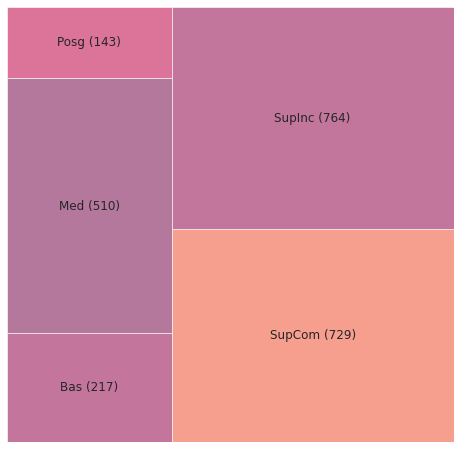

In [27]:
mask = df['VarObj'] == 'N'
a = df[mask].groupby('NivelEdu').sum().index.get_level_values(0).tolist()
d = df[mask].groupby('NivelEdu').count().reset_index()['ID'].tolist()
for i in range(len(a)):
  a[i] = str(a[i]) + ' (' + str(d[i])+ ')'
plt.figure(figsize=(8,8))
squarify.plot(sizes=d, label=a, alpha=.6)
plt.axis('off')
plt.show()

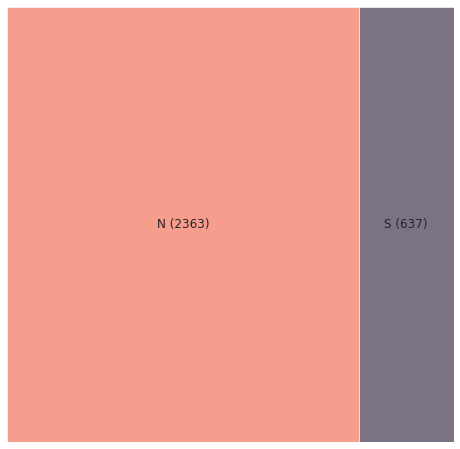

In [28]:
a = df.groupby('VarObj').count().index.get_level_values(0).tolist()
d = df.groupby('VarObj').count().reset_index()['ID'].tolist()
for i in range(len(a)):
  a[i] = str(a[i]) + ' (' + str(d[i])+ ')'
plt.figure(figsize=(8,8))
squarify.plot(sizes=d, label=a, alpha=.6)
plt.axis('off')
plt.show()

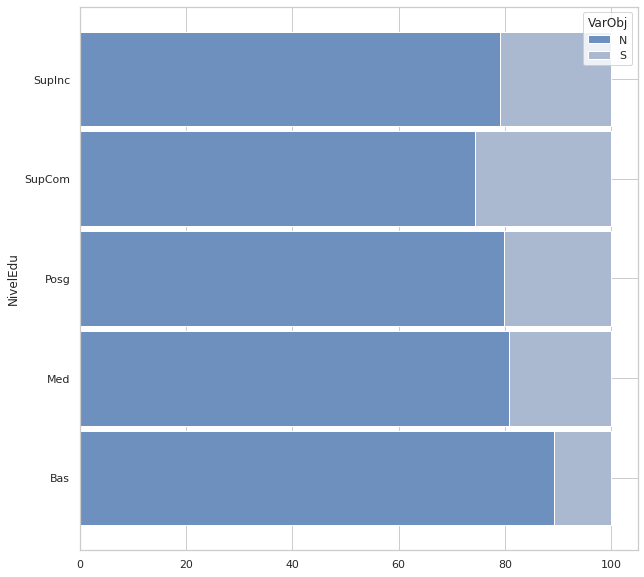

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
pd.crosstab(index=df['VarObj'], 
            columns=df['NivelEdu']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0).T.plot(kind='barh',stacked=True,width=0.95,ax=ax)

## Pre-procesamiento

In [30]:
null = ['AgnosDirec','AgnosEmpleo','DeudaExt','DeudaInt','Edad','Ingreso']
for n in null:
  mean = df[n].mean(skipna=True)
  df[n].fillna(value=mean,inplace=True)
df.isna().sum()

ID              0
AgnosDirec      0
AgnosEmpleo     0
DeudaExt        0
DeudaInt        0
Edad            0
Ingreso         0
Ingreso2        0
Nacionalidad    0
NivelEdu        0
VarObj          0
dtype: int64

In [31]:
df['DeudaIng'] = (df['DeudaExt']+df['DeudaInt'])/df['Ingreso']
df.head()

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj,DeudaIng
0,100001,4.0,2.0,9561.984843,7660.036317,40.0,64117.447797,44473.097916,N,SupInc,S,0.268601
1,100002,28.0,25.0,11985.886924,6872.030508,49.0,124062.085998,84958.101814,N,Med,N,0.152004
2,100003,2.0,3.0,1028.356328,1075.598877,38.0,32010.884862,27638.818281,N,SupCom,N,0.065726
3,100004,11.0,14.0,10974.303210,2377.430575,43.0,172337.436327,125056.572446,N,Bas,N,0.077474
4,100005,3.0,1.0,842.807194,1142.827425,33.0,25937.760762,23755.321327,N,SupInc,S,0.076554


## Transformaciones

In [32]:
ln_var = list(df.describe().columns)[1:]
for l in ln_var:
  var = 'ln_' + l
  df[var] = df[l].apply(lambda x: np.log(x+1) if x == 0 else np.log(x))
df.head()

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj,DeudaIng,ln_AgnosDirec,ln_AgnosEmpleo,ln_DeudaExt,ln_DeudaInt,ln_Edad,ln_Ingreso,ln_Ingreso2,ln_DeudaIng
0,100001,4.0,2.0,9561.984843,7660.036317,40.0,64117.447797,44473.097916,N,SupInc,S,0.268601,1.386294,0.693147,9.165551,8.943772,3.688879,11.068472,10.702640,-1.314528
1,100002,28.0,25.0,11985.886924,6872.030508,49.0,124062.085998,84958.101814,N,Med,N,0.152004,3.332205,3.218876,9.391485,8.835215,3.891820,11.728537,11.349913,-1.883849
2,100003,2.0,3.0,1028.356328,1075.598877,38.0,32010.884862,27638.818281,N,SupCom,N,0.065726,0.693147,1.098612,6.935717,6.980633,3.637586,10.373831,10.226977,-2.722257
3,100004,11.0,14.0,10974.303210,2377.430575,43.0,172337.436327,125056.572446,N,Bas,N,0.077474,2.397895,2.639057,9.303312,7.773776,3.761200,12.057210,11.736521,-2.557808
4,100005,3.0,1.0,842.807194,1142.827425,33.0,25937.760762,23755.321327,N,SupInc,S,0.076554,1.098612,0.000000,6.736738,7.041261,3.496508,10.163455,10.075562,-2.569761


In [33]:
df = pd.get_dummies(df,columns=['NivelEdu','VarObj'],drop_first=True)
df.head()

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,DeudaIng,...,ln_DeudaInt,ln_Edad,ln_Ingreso,ln_Ingreso2,ln_DeudaIng,NivelEdu_Med,NivelEdu_Posg,NivelEdu_SupCom,NivelEdu_SupInc,VarObj_S
0,100001,4.0,2.0,9561.984843,7660.036317,40.0,64117.447797,44473.097916,N,0.268601,...,8.943772,3.688879,11.068472,10.702640,-1.314528,0,0,0,1,1
1,100002,28.0,25.0,11985.886924,6872.030508,49.0,124062.085998,84958.101814,N,0.152004,...,8.835215,3.891820,11.728537,11.349913,-1.883849,1,0,0,0,0
2,100003,2.0,3.0,1028.356328,1075.598877,38.0,32010.884862,27638.818281,N,0.065726,...,6.980633,3.637586,10.373831,10.226977,-2.722257,0,0,1,0,0
3,100004,11.0,14.0,10974.303210,2377.430575,43.0,172337.436327,125056.572446,N,0.077474,...,7.773776,3.761200,12.057210,11.736521,-2.557808,0,0,0,0,0
4,100005,3.0,1.0,842.807194,1142.827425,33.0,25937.760762,23755.321327,N,0.076554,...,7.041261,3.496508,10.163455,10.075562,-2.569761,0,0,0,1,1


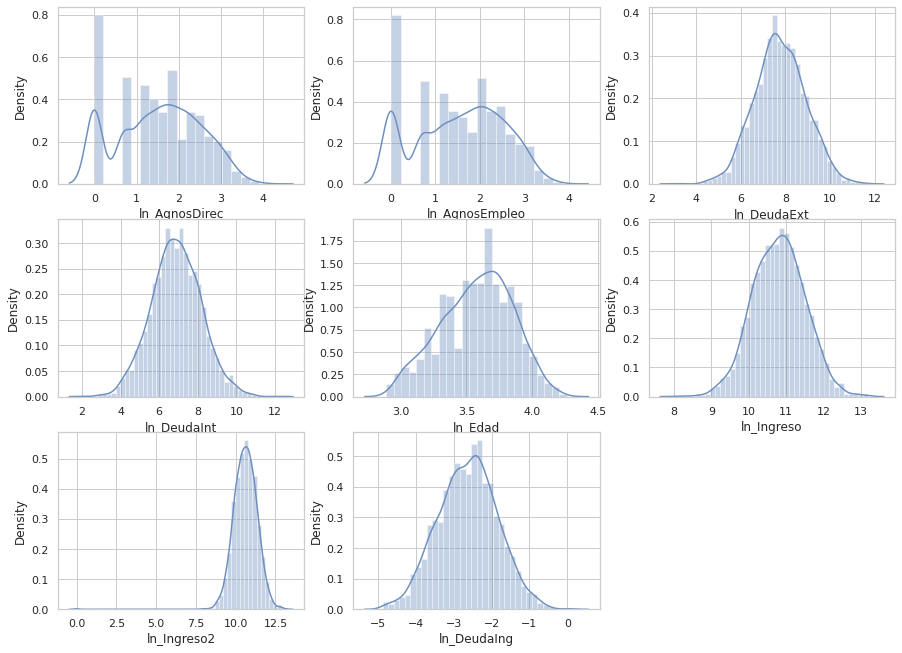

In [34]:
graf = df.copy()
graf = graf.iloc[:,10:18]

f = plt.figure(figsize=(15,15))
for i in range(8):
    f.add_subplot(4, 3, i+1)
    sns.distplot(graf.iloc[:,i])
plt.show()

In [35]:
df.iloc[:,1:18].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
AgnosDirec,3000.0,7.088,6.961,0.000,2.000,5.000,10.000,61.000
AgnosEmpleo,3000.0,7.147,6.651,0.000,2.000,5.000,10.000,47.000
DeudaExt,3000.0,4531.013,7083.594,21.551,1110.371,2278.910,5089.922,123939.236
DeudaInt,3000.0,2275.677,5406.183,8.304,417.285,960.163,2317.458,190648.853
Edad,3000.0,37.020,9.787,18.000,29.000,37.000,44.000,71.000
Ingreso,3000.0,62576.498,49358.117,3141.067,30284.272,49572.952,78817.515,536488.400
Ingreso2,3000.0,52159.149,42238.037,0.000,25109.557,40632.271,66206.198,513618.589
DeudaIng,3000.0,0.097,0.085,0.008,0.042,0.074,0.123,1.088
ln_AgnosDirec,3000.0,1.525,0.978,0.000,0.693,1.609,2.303,4.111
ln_AgnosEmpleo,3000.0,1.543,0.983,0.000,0.693,1.609,2.303,3.850


In [36]:
df.columns

Index(['ID', 'AgnosDirec', 'AgnosEmpleo', 'DeudaExt', 'DeudaInt', 'Edad',
       'Ingreso', 'Ingreso2', 'Nacionalidad', 'DeudaIng', 'ln_AgnosDirec',
       'ln_AgnosEmpleo', 'ln_DeudaExt', 'ln_DeudaInt', 'ln_Edad', 'ln_Ingreso',
       'ln_Ingreso2', 'ln_DeudaIng', 'NivelEdu_Med', 'NivelEdu_Posg',
       'NivelEdu_SupCom', 'NivelEdu_SupInc', 'VarObj_S'],
      dtype='object')

In [37]:
# ID no aporta información
# Nacionalidad no aporta información

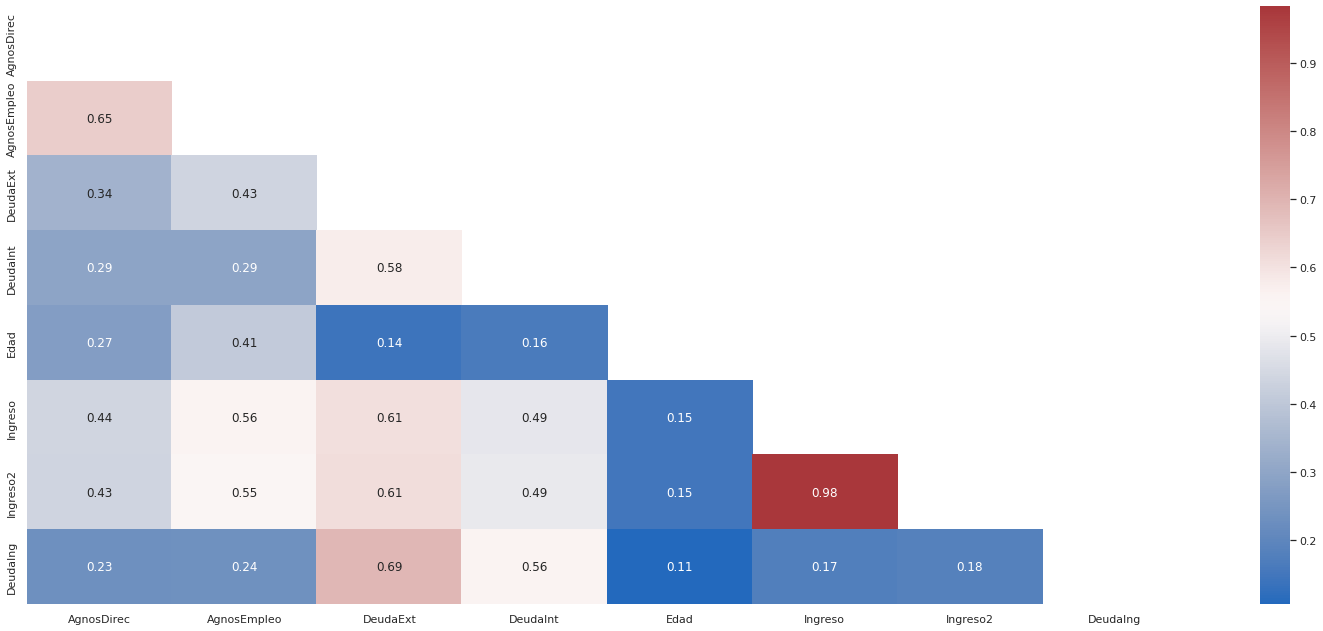

In [38]:
f = ['AgnosDirec', 
     'AgnosEmpleo', 'DeudaExt', 'DeudaInt', 'Edad','Ingreso', 
     'Ingreso2', 'DeudaIng']

corr = df[f].corr(method='pearson').abs().round(3)

f, ax = plt.subplots(figsize=(26, 11))
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

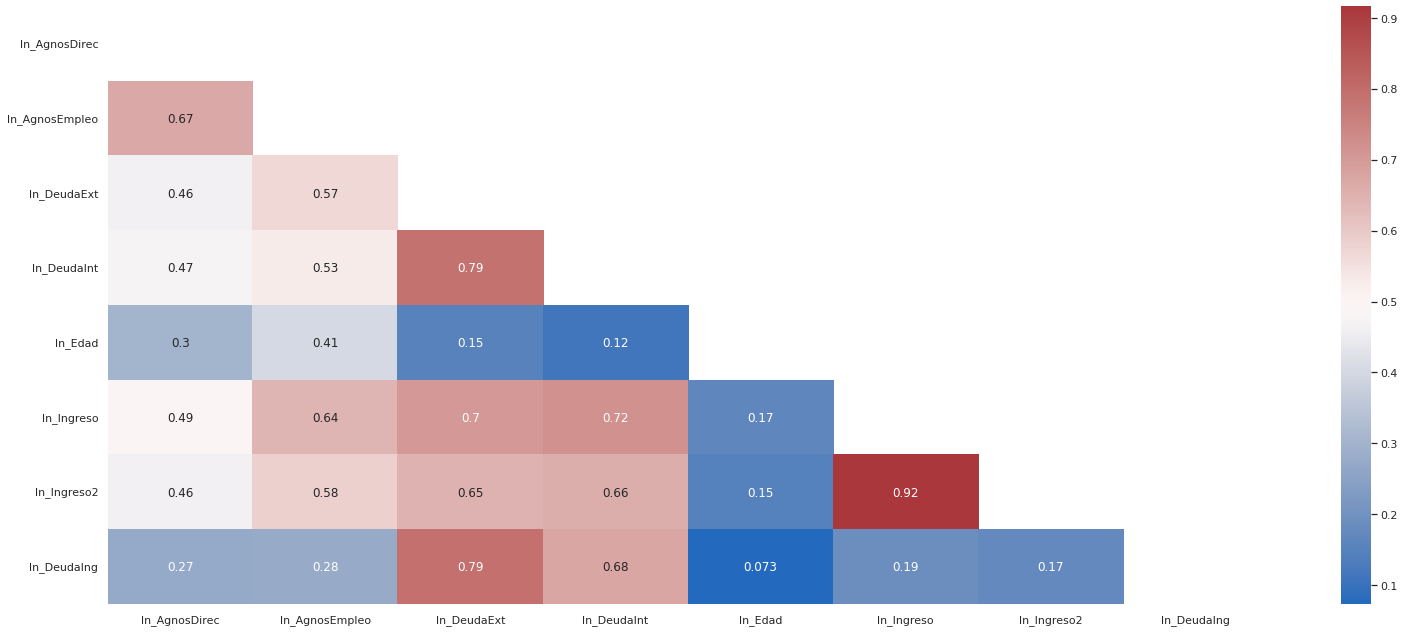

In [39]:
f = ['ln_AgnosDirec',
       'ln_AgnosEmpleo', 'ln_DeudaExt', 'ln_DeudaInt', 'ln_Edad', 'ln_Ingreso',
       'ln_Ingreso2', 'ln_DeudaIng']
       
corr2 = df[f].corr(method='pearson').abs().round(3)

f, ax = plt.subplots(figsize=(26, 11))
mask = np.triu(np.ones_like(corr2, dtype=bool))

sns.heatmap(corr2, annot=True, mask = mask, cmap=cmap)

## Selección de Atributos

### Random Forest y Feature Importances

In [40]:
X = df.copy()
X = X[['AgnosDirec', 'AgnosEmpleo', 'DeudaExt', 'DeudaInt', 'Edad',
       'Ingreso', 'Ingreso2', 'DeudaIng','NivelEdu_Med', 'NivelEdu_Posg',
       'NivelEdu_SupCom', 'NivelEdu_SupInc', 'VarObj_S']].sample(1000)
y = X['VarObj_S']
X = X.drop(columns='VarObj_S')

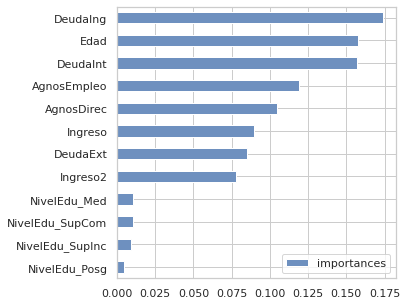

In [41]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=12345)
forest.fit(X, y)

bestfeatures = set()

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
imps = pd.DataFrame.from_dict({"importances": importances})
imps.index = list(X)
imps.sort_values(by="importances").plot.barh(figsize=(5, 5))
bestfeatures |= set(imps.sort_values(by="importances").iloc[-10:].index) # add best features

In [42]:
# Top 5 variables: DeudaIng, DeudaInt, AgnosEmpleo, Edad, DeudaExt
# ingreso > Ingreso2

In [43]:
X = df.copy()
X = X[['ln_AgnosDirec',
       'ln_AgnosEmpleo', 'ln_DeudaExt', 'ln_DeudaInt', 'ln_Edad', 'ln_Ingreso',
       'ln_Ingreso2', 'ln_DeudaIng', 'NivelEdu_Med', 'NivelEdu_Posg',
       'NivelEdu_SupCom', 'NivelEdu_SupInc', 'VarObj_S']].sample(1000)
y = X['VarObj_S']
X = X.drop(columns='VarObj_S')

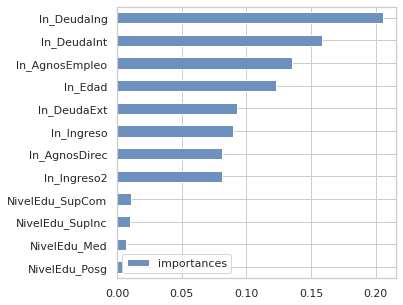

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=12345)
forest.fit(X, y)

bestfeatures = set()

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
imps = pd.DataFrame.from_dict({"importances": importances})
imps.index = list(X)
imps.sort_values(by="importances").plot.barh(figsize=(5, 5))
bestfeatures |= set(imps.sort_values(by="importances").iloc[-10:].index) # add best features

In [45]:
# Top 5 variables: ln_DeudaIng, ln_DeudaInt, ln_Edad, ln_AgnosEmpleo, ln_AgnosDirec
# ln_ingreso > ln_Ingreso2

### Variables Seleccionadas

In [46]:
# se descartan: 'ID','Nacionalidad' por no aportar información
# se descartan las variables 'AgnosDirec', 'AgnosEmpleo', 'DeudaExt', 'DeudaInt', 'Edad','Ingreso', 'Ingreso2',  'DeudaIng' y se dejan las variables normalizadas
# ln_Ingreso2 se descarta por colinealidad cuasi-perfecta con ln_Ingreso, además de verse con menor feature immportance vs ln_Ingreso
# se dejan las variables de NivelEdu, al verse una variación entre niveles educacionales sobre la variable objetivo

In [47]:
features = ['ln_AgnosDirec','ln_AgnosEmpleo', 'ln_DeudaExt', 'ln_DeudaInt', 'ln_Edad', 'ln_Ingreso','ln_DeudaIng',
            'NivelEdu_Med', 'NivelEdu_Posg','NivelEdu_SupCom', 'NivelEdu_SupInc',]
X = df[features]
y = df['VarObj_S']

In [48]:
X.head()

,ln_AgnosDirec,ln_AgnosEmpleo,ln_DeudaExt,ln_DeudaInt,ln_Edad,ln_Ingreso,ln_DeudaIng,NivelEdu_Med,NivelEdu_Posg,NivelEdu_SupCom,NivelEdu_SupInc
0,1.386294,0.693147,9.165551,8.943772,3.688879,11.068472,-1.314528,0,0,0,1
1,3.332205,3.218876,9.391485,8.835215,3.891820,11.728537,-1.883849,1,0,0,0
2,0.693147,1.098612,6.935717,6.980633,3.637586,10.373831,-2.722257,0,0,1,0
3,2.397895,2.639057,9.303312,7.773776,3.761200,12.057210,-2.557808,0,0,0,0
4,1.098612,0.000000,6.736738,7.041261,3.496508,10.163455,-2.569761,0,0,0,1


In [49]:
y.head()

0    1
1    0
2    0
3    0
4    1
Name: VarObj_S, dtype: uint8

# Entrenamiento de la Red Neuronal con Descenso del Gradiente

### Split y Escalamiento

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=12345)

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Confguración de la Red Neuronal

In [52]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Precision, Recall

In [53]:
# CALLBACKS
callback_es = EarlyStopping(monitor='val_loss', patience=30)
callback_mc = ModelCheckpoint(path_base + '/models/' + 'best_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')

# LOSSES
loss =  BinaryCrossentropy()

# SCHEDULES
lr_schedule_ED = ExponentialDecay(initial_learning_rate=1e-2,decay_steps=10,decay_rate=0.95)

# OPTIMIZERS
opt = SGD(learning_rate=0.01)

# METRICS
#metric = Precision()
metric = Recall()

In [54]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [55]:
model = Sequential()
model.add(Dense(100, input_dim=11,activation='relu'))
model.add(Dense(90,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [56]:
model.compile(loss=loss, optimizer=opt, metrics=[metric])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 90)                9090      
                                                                 
 dense_2 (Dense)             (None, 80)                7280      
                                                                 
 dense_3 (Dense)             (None, 50)                4050      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 21,671
Trainable params: 21,671
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento

In [57]:
max_epochs = 1000
history = model.fit(X_train,y_train, epochs=max_epochs, validation_data=(X_test, y_test),batch_size=100, callbacks=[callback_es,callback_mc],verbose=1)

Epoch 1/1000
24/24 [==============================] - 3s 32ms/step - loss: 0.6528 - recall: 0.2125 - val_loss: 0.6016 - val_recall: 0.0000e+00
Epoch 2/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.5723 - recall: 0.0000e+00 - val_loss: 0.5438 - val_recall: 0.0000e+00
Epoch 3/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.5295 - recall: 0.0000e+00 - val_loss: 0.5118 - val_recall: 0.0000e+00
Epoch 4/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.5050 - recall: 0.0000e+00 - val_loss: 0.4927 - val_recall: 0.0000e+00
Epoch 5/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.4891 - recall: 0.0000e+00 - val_loss: 0.4793 - val_recall: 0.0000e+00
Epoch 6/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.4771 - recall: 0.0000e+00 - val_loss: 0.4688 - val_recall: 0.0000e+00
Epoch 7/1000
24/24 [==============================] - 0s 17ms/step - loss: 0.4666 - recall: 0.0000e+00 - val_loss: 0.4595 -

# Evaluación

In [58]:
acc = history.history['recall']
test_acc = history.history['val_recall']

loss = history.history['loss']
test_loss = history.history['val_loss']

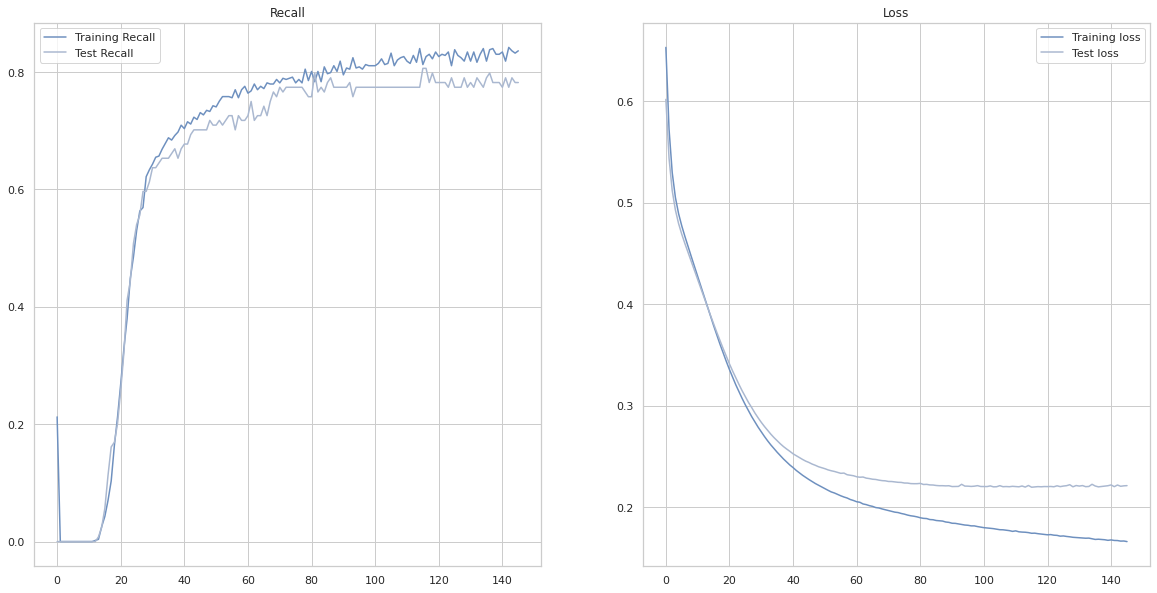

In [59]:
figura, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

n_epochs = len(acc)

ax1.plot(range(n_epochs), acc, label='Training Recall')
ax1.plot(range(n_epochs), test_acc, label='Test Recall')
ax1.set_title('Recall')
ax1.legend()

ax2.plot(range(n_epochs), loss, label='Training loss')
ax2.plot(range(n_epochs), test_loss, label='Test loss')
ax2.set_title('Loss')
ax2.legend()

In [60]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [61]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

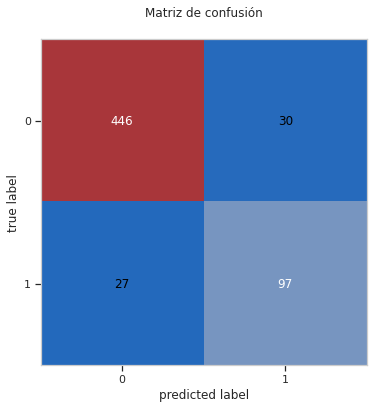

In [62]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [63]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 4ms/step - loss: 0.2213 - recall: 0.7823


[0.22132675349712372, 0.7822580933570862]

In [64]:
from tensorflow import keras
best_model = keras.models.load_model(path_base + '/models/' + 'best_model.hdf5')

In [65]:
y_pred = best_model.predict(X_test)
y_pred = np.round(y_pred)

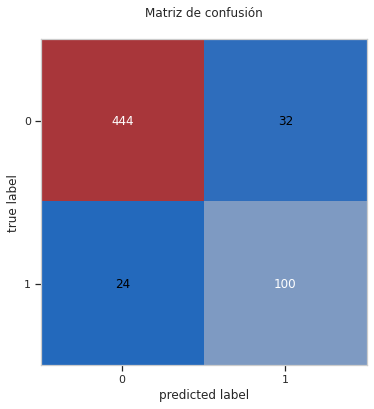

In [66]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [67]:
best_model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 4ms/step - loss: 0.2198 - recall: 0.8065


[0.21976128220558167, 0.8064516186714172]

# Entrenamiento de Redes Neuronales con distintos Optimizadores

### Confguración de las Redes Neuronales

In [68]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam, RMSprop, Adadelta
from tensorflow.keras.metrics import Precision, Recall

In [69]:
# CALLBACKS
callback_es_1 = EarlyStopping(monitor='val_loss', patience=30)
callback_mc_1 = ModelCheckpoint(path_base + '/models/' + 'best_model_1.hdf5', save_best_only=True, monitor='val_loss', mode='min')

callback_es_2 = EarlyStopping(monitor='val_loss', patience=30)
callback_mc_2 = ModelCheckpoint(path_base + '/models/' + 'best_model_2.hdf5', save_best_only=True, monitor='val_loss', mode='min')

callback_es_3 = EarlyStopping(monitor='val_loss', patience=30)
callback_mc_3 = ModelCheckpoint(path_base + '/models/' + 'best_model_3.hdf5', save_best_only=True, monitor='val_loss', mode='min')

# LOSSES
loss =  BinaryCrossentropy()

# SCHEDULES
lr_schedule_ED = ExponentialDecay(initial_learning_rate=1e-2,decay_steps=10,decay_rate=0.95)

# OPTIMIZERS
opt1 = Adam(learning_rate=1e-4)
opt2 = RMSprop(learning_rate=0.01)
opt3 = Adadelta(learning_rate=0.01)

# METRICS
#metric = Precision()
metric = Recall()

In [70]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [71]:
model_1 = Sequential()
model_1.add(Dense(100, input_dim=11,activation='relu'))
model_1.add(Dense(90,activation='relu'))
model_1.add(Dense(80,activation='relu'))
model_1.add(Dense(50,activation='relu'))
model_1.add(Dense(1,activation='sigmoid'))

model_2 = Sequential()
model_2.add(Dense(100, input_dim=11,activation='relu'))
model_2.add(Dense(90,activation='relu'))
model_2.add(Dense(80,activation='relu'))
model_2.add(Dense(50,activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))

model_3 = Sequential()
model_3.add(Dense(100, input_dim=11,activation='relu'))
model_3.add(Dense(90,activation='relu'))
model_3.add(Dense(80,activation='relu'))
model_3.add(Dense(50,activation='relu'))
model_3.add(Dense(1,activation='sigmoid'))

In [72]:
model_1.compile(loss=loss, optimizer=opt1, metrics=[metric])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               1200      
                                                                 
 dense_6 (Dense)             (None, 90)                9090      
                                                                 
 dense_7 (Dense)             (None, 80)                7280      
                                                                 
 dense_8 (Dense)             (None, 50)                4050      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 21,671
Trainable params: 21,671
Non-trainable params: 0
_________________________________________________________________


In [73]:
model_2.compile(loss=loss, optimizer=opt2, metrics=[metric])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               1200      
                                                                 
 dense_11 (Dense)            (None, 90)                9090      
                                                                 
 dense_12 (Dense)            (None, 80)                7280      
                                                                 
 dense_13 (Dense)            (None, 50)                4050      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 21,671
Trainable params: 21,671
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_3.compile(loss=loss, optimizer=opt3, metrics=[metric])
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               1200      
                                                                 
 dense_16 (Dense)            (None, 90)                9090      
                                                                 
 dense_17 (Dense)            (None, 80)                7280      
                                                                 
 dense_18 (Dense)            (None, 50)                4050      
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 21,671
Trainable params: 21,671
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento

#### Optimizador 1

In [75]:
max_epochs = 1000
history_1 = model_1.fit(X_train,y_train, epochs=max_epochs, validation_data=(X_test, y_test),batch_size=100, callbacks=[callback_es_1,callback_mc_1],verbose=1)

Epoch 1/1000
24/24 [==============================] - 1s 15ms/step - loss: 0.7268 - recall_1: 0.9337 - val_loss: 0.6858 - val_recall_1: 0.6048
Epoch 2/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.6571 - recall_1: 0.2710 - val_loss: 0.6281 - val_recall_1: 0.0000e+00
Epoch 3/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.6052 - recall_1: 0.0019 - val_loss: 0.5782 - val_recall_1: 0.0000e+00
Epoch 4/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.5575 - recall_1: 0.0000e+00 - val_loss: 0.5309 - val_recall_1: 0.0000e+00
Epoch 5/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.5136 - recall_1: 0.0000e+00 - val_loss: 0.4906 - val_recall_1: 0.0000e+00
Epoch 6/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.4763 - recall_1: 0.0000e+00 - val_loss: 0.4567 - val_recall_1: 0.0000e+00
Epoch 7/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.4431 - recall_1: 0.0000e+00 - val_loss:

#### Optimizador 2

In [76]:
max_epochs = 1000
history_2 = model_2.fit(X_train,y_train, epochs=max_epochs, validation_data=(X_test, y_test),batch_size=100, callbacks=[callback_es_2,callback_mc_2],verbose=1)

Epoch 1/1000
24/24 [==============================] - 3s 29ms/step - loss: 0.3975 - recall_1: 0.5542 - val_loss: 0.2509 - val_recall_1: 0.7419
Epoch 2/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.2259 - recall_1: 0.7193 - val_loss: 0.2550 - val_recall_1: 0.8306
Epoch 3/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.2199 - recall_1: 0.7622 - val_loss: 0.2515 - val_recall_1: 0.8226
Epoch 4/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.2089 - recall_1: 0.7953 - val_loss: 0.2391 - val_recall_1: 0.8710
Epoch 5/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.1968 - recall_1: 0.7641 - val_loss: 0.2959 - val_recall_1: 0.5323
Epoch 6/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.1966 - recall_1: 0.7895 - val_loss: 0.3161 - val_recall_1: 0.6855
Epoch 7/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.1940 - recall_1: 0.7895 - val_loss: 0.2157 - val_recall_1: 0.7258

#### Optimizador 3

In [77]:
max_epochs = 1000
history_3 = model_3.fit(X_train,y_train, epochs=max_epochs, validation_data=(X_test, y_test),batch_size=100, callbacks=[callback_es_3,callback_mc_3],verbose=1)

Epoch 1/1000
24/24 [==============================] - 2s 31ms/step - loss: 0.6655 - recall_1: 0.1711 - val_loss: 0.6557 - val_recall_1: 0.0161
Epoch 2/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.6546 - recall_1: 0.0117 - val_loss: 0.6448 - val_recall_1: 0.0081
Epoch 3/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.6441 - recall_1: 0.0058 - val_loss: 0.6343 - val_recall_1: 0.0000e+00
Epoch 4/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.6339 - recall_1: 0.0019 - val_loss: 0.6240 - val_recall_1: 0.0000e+00
Epoch 5/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.6239 - recall_1: 0.0019 - val_loss: 0.6139 - val_recall_1: 0.0000e+00
Epoch 6/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.6139 - recall_1: 0.0019 - val_loss: 0.6039 - val_recall_1: 0.0000e+00
Epoch 7/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.6042 - recall_1: 0.0019 - val_loss: 0.5939 - val_r

# Evaluación de Redes Neuronales con distintos Optimizadores

## Evaluación Optimizador: Adam

In [78]:
acc = history_1.history['recall_1']
test_acc = history_1.history['val_recall_1']

loss = history_1.history['loss']
test_loss = history_1.history['val_loss']

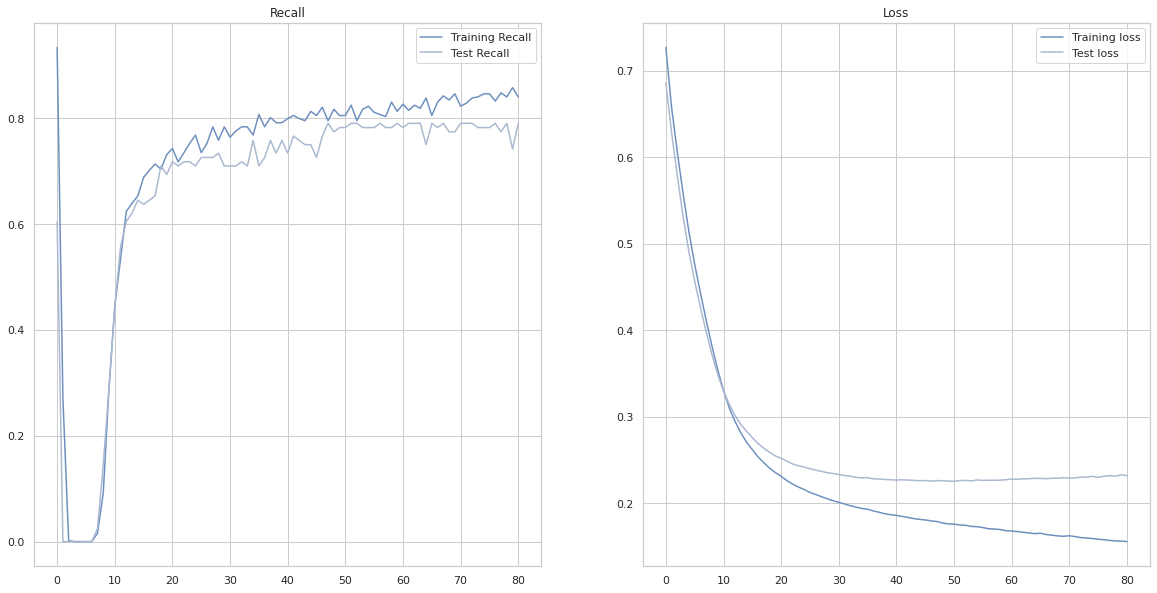

In [79]:
figura, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

n_epochs = len(acc)

ax1.plot(range(n_epochs), acc, label='Training Recall')
ax1.plot(range(n_epochs), test_acc, label='Test Recall')
ax1.set_title('Recall')
ax1.legend()

ax2.plot(range(n_epochs), loss, label='Training loss')
ax2.plot(range(n_epochs), test_loss, label='Test loss')
ax2.set_title('Loss')
ax2.legend()

In [80]:
y_pred = model_1.predict(X_test)
y_pred = np.round(y_pred)

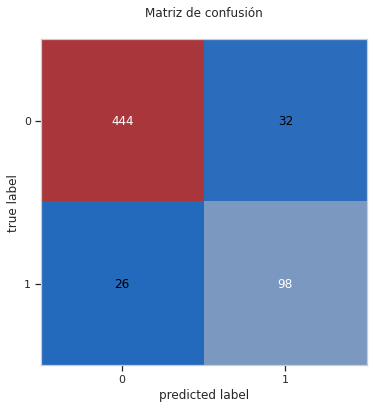

In [81]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [82]:
model_1.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2320 - recall_1: 0.7903


[0.23202982544898987, 0.7903226017951965]

In [83]:
from tensorflow import keras
best_model_1 = keras.models.load_model(path_base + '/models/' + 'best_model_1.hdf5')

In [84]:
y_pred = best_model_1.predict(X_test)
y_pred = np.round(y_pred)

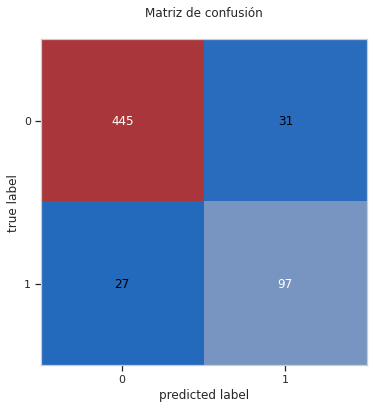

In [85]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [86]:
best_model_1.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2255 - recall_1: 0.7823


[0.2255372405052185, 0.7822580933570862]

## Evaluación Optimizador: RMSprop

In [87]:
acc = history_2.history['recall_1']
test_acc = history_2.history['val_recall_1']

loss = history_2.history['loss']
test_loss = history_2.history['val_loss']

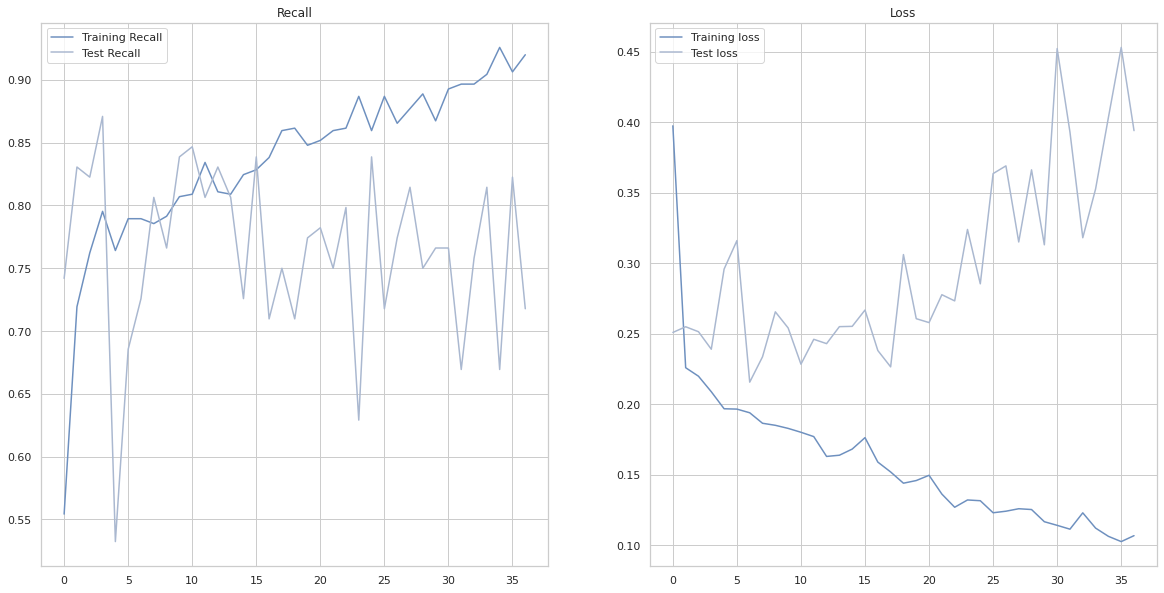

In [88]:
figura, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

n_epochs = len(acc)

ax1.plot(range(n_epochs), acc, label='Training Recall')
ax1.plot(range(n_epochs), test_acc, label='Test Recall')
ax1.set_title('Recall')
ax1.legend()

ax2.plot(range(n_epochs), loss, label='Training loss')
ax2.plot(range(n_epochs), test_loss, label='Test loss')
ax2.set_title('Loss')
ax2.legend()

In [89]:
y_pred = model_2.predict(X_test)
y_pred = np.round(y_pred)

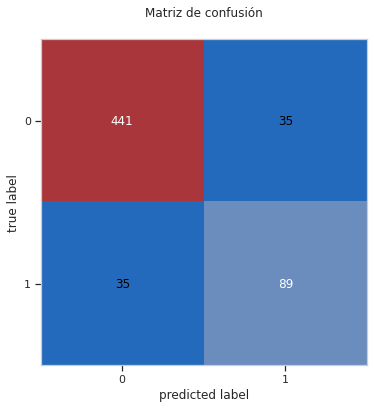

In [90]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [91]:
model_2.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.3940 - recall_1: 0.7177


[0.39404410123825073, 0.7177419066429138]

In [92]:
from tensorflow import keras
best_model_2 = keras.models.load_model(path_base + '/models/' + 'best_model_2.hdf5')

In [93]:
y_pred = best_model_2.predict(X_test)
y_pred = np.round(y_pred)

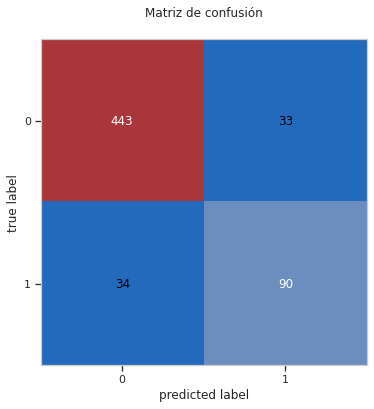

In [94]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [95]:
best_model_2.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2157 - recall_1: 0.7258


[0.2157009094953537, 0.725806474685669]

## Evaluación Optimizador: Adadelta

In [96]:
acc = history_3.history['recall_1']
test_acc = history_3.history['val_recall_1']

loss = history_3.history['loss']
test_loss = history_3.history['val_loss']

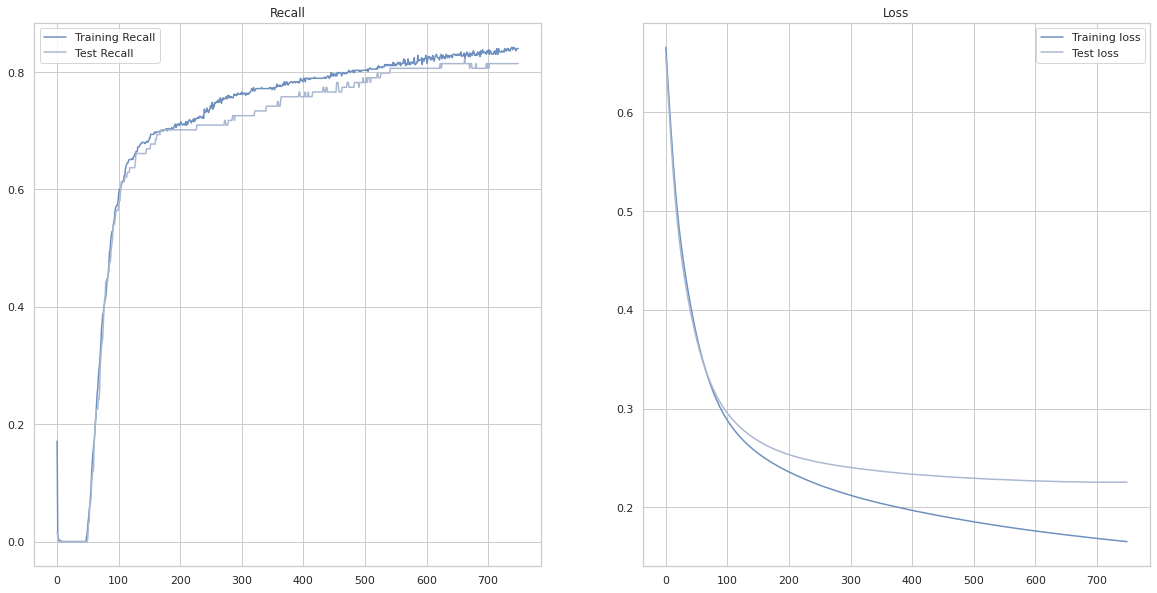

In [97]:
figura, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

n_epochs = len(acc)

ax1.plot(range(n_epochs), acc, label='Training Recall')
ax1.plot(range(n_epochs), test_acc, label='Test Recall')
ax1.set_title('Recall')
ax1.legend()

ax2.plot(range(n_epochs), loss, label='Training loss')
ax2.plot(range(n_epochs), test_loss, label='Test loss')
ax2.set_title('Loss')
ax2.legend()

In [98]:
y_pred = model_3.predict(X_test)
y_pred = np.round(y_pred)

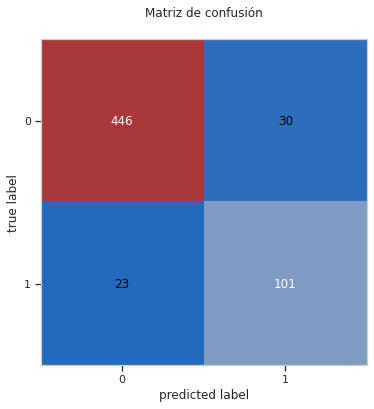

In [99]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [100]:
model_3.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2256 - recall_1: 0.8145


[0.22560861706733704, 0.8145161271095276]

In [101]:
from tensorflow import keras
best_model_3 = keras.models.load_model(path_base + '/models/' + 'best_model_3.hdf5')

In [102]:
y_pred = best_model_3.predict(X_test)
y_pred = np.round(y_pred)

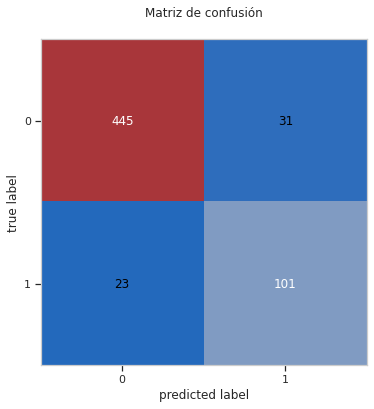

In [103]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [104]:
best_model_3.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2255 - recall_1: 0.8145


[0.2255432903766632, 0.8145161271095276]

# Resumen de Desempeño de las Redes Neuronales

In [105]:
best_model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2198 - recall: 0.8065


[0.21976128220558167, 0.8064516186714172]

In [106]:
best_model_1.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2255 - recall_1: 0.7823


[0.2255372405052185, 0.7822580933570862]

In [107]:
best_model_2.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2157 - recall_1: 0.7258


[0.2157009094953537, 0.725806474685669]

In [108]:
best_model_3.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2255 - recall_1: 0.8145


[0.2255432903766632, 0.8145161271095276]

# Conclusiones